# Lesson 15: 심슨의 역설 (draft)

최규빈  
2023-07-26

<a href="https://colab.research.google.com/github/guebin/PP2023SUM/blob/main/posts/Day3/07_ggplot2/ls15.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상

<https://youtu.be/XlwSIZPcBpM?list=PLQqh36zP38-xZATz1NBj-5czur3IJj19D>

# imports

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

# 판다스: melt, stack

### melt

`-` 설명:

`-` 데이터

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

`-` 사용예시1: 기본사용

-   variable: column name들이 들어간다.
-   value: column name에 대응하는 값들이 들어간다.

`-` 사용예시2: id_vars –\> tidy data

In [13]:
df.melt(id_vars='Date')

`-` 사용예시3:

In [14]:
df.set_index('Date').melt()

`-` 사용예시4: ignore_index=False

In [15]:
df.melt(id_vars='Date')

In [20]:
df.set_index('Date').melt(ignore_index=False).reset_index()

## stack

`-` 설명:

In [27]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

`-` 사용예시1

`-` 사용예시2

In [36]:
df.stack().stack().reset_index().rename({0:'value'},axis=1)
#df.stack().stack().reset_index().rename(columns={'level_2':'aggtype'})

`-` 사용예시3 (unstack)

In [37]:
df.stack().unstack()

> melt, stack 을 set_index와 reset_index와 함께 사용하면 tidydata를
> 만들기 용이하다.

# tidydata

## tidydata의 정의

`-` 느낌: ggplot으로 그림 그리기 좋은 데이터 + pandas로 query, group by
등을 쓰기 좋은 자료

`-` 정의: https://r4ds.had.co.nz/tidy-data.html

-   Each variable must have its own column.
-   Each observation must have its own row.
-   Each value must have its own cell.

예시1 (tidy data)

| obs |  x  |  y  | shape  | color |
|:---:|:---:|:---:|:------:|:-----:|
|  0  |  0  |  0  | ‘star’ |  ‘F’  |
|  1  |  0  |  1  | ‘circ’ |  ‘F’  |
|  2  |  1  |  0  | ‘star’ |  ‘M’  |
|  3  |  1  |  1  | ‘circ’ |  ‘M’  |

예시2 (tidy data x)

|         | shape=star | shape=circ |
|:-------:|:----------:|:----------:|
| color=F |   (0,0)    |   (0,1)    |
| color=M |   (1,0)    |   (1,1)    |

## 예제1: wide df

`-` data

In [12]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

-   tidy data 아님
-   정의에 의한 판단: 하나의 observation이 하나의 행을 차지하고 있지
    않음.
-   직관적인 판단: 회사별로 색을 다르게 하여 x:‘Date’, y:’판매량’을 하고
    싶다면?

`-` tidydata로 변환 (melt는 너무 쉬우니까 stack으로 해보자)

In [13]:
df.set_index('Date').stack().reset_index().rename({'level_1':'Company',0:'Sales'},axis=1)

## 예제2: multi-indexed data

`-` 데이터

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

-   tidy data 아님
-   정의에 의한 판단: 하나의 셀에 여러 관측치가 있음 (표안의 표 느낌)
-   직관적인 판단: WEEKDAY == 4 and mean(CANCELLED) \> 0.001 인 자료를
    뽑고 싶다면?

`-` tidydata로 변환 (stack으로 풀면 너무 쉬우니까 melt로 해보자)

In [15]:
df.melt(ignore_index=False).reset_index()

# barplot

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')\
.query('Nationality=="Korea Republic" or Nationality=="Japan"')\
[['Nationality','Overall','Age']].reset_index(drop=True)
df

## geom_col

`-` 예시1: 한국과 일본의 평균능력치 비교

In [46]:
data=df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

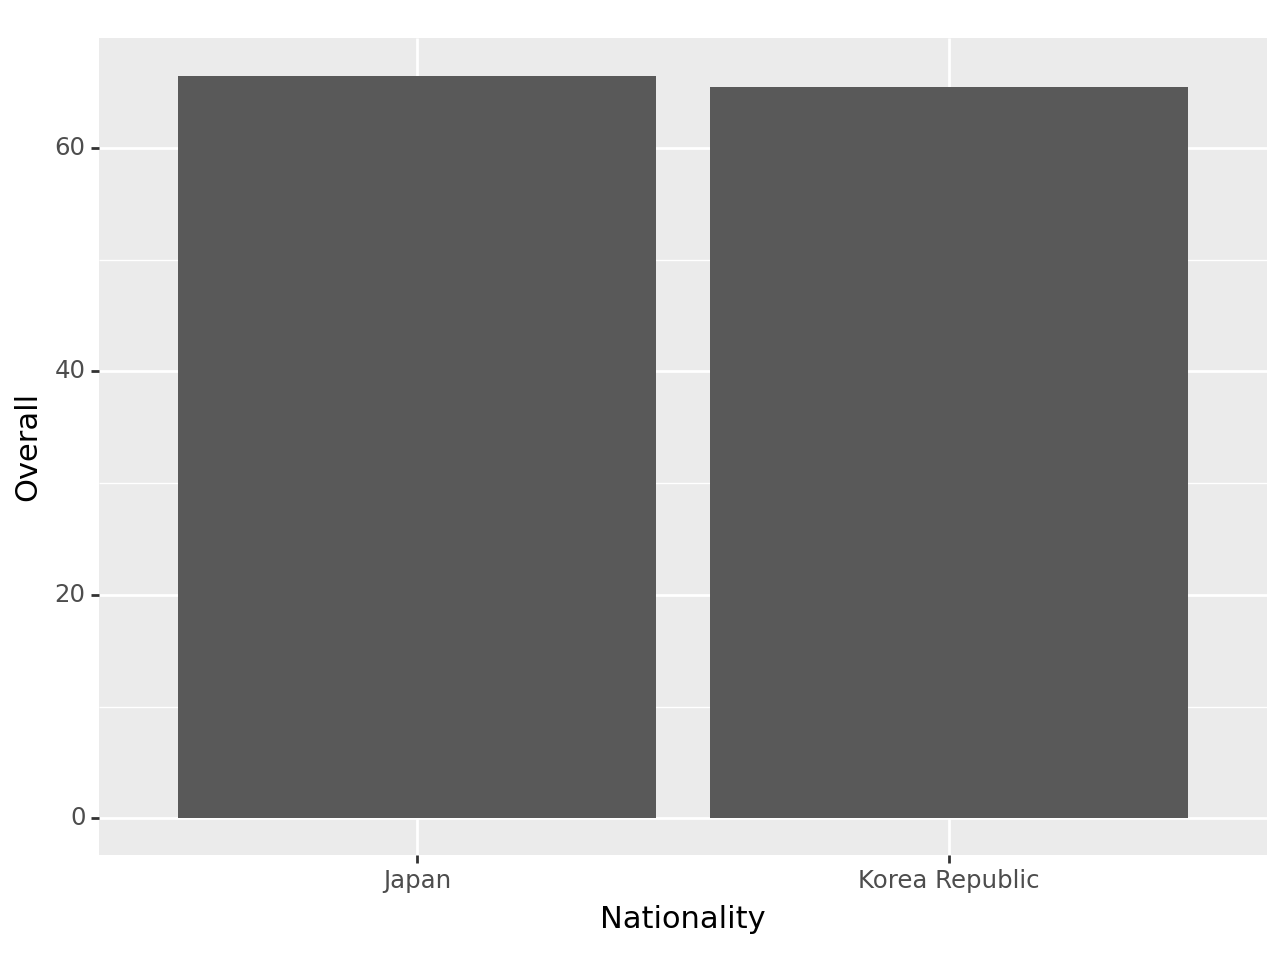

In [55]:
ggplot(data)+geom_col(aes(x='Nationality',y='Overall'))

`-` 예시2: 한국과 일본의 평균능력치 비교 (색상변경)

In [56]:
data=df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

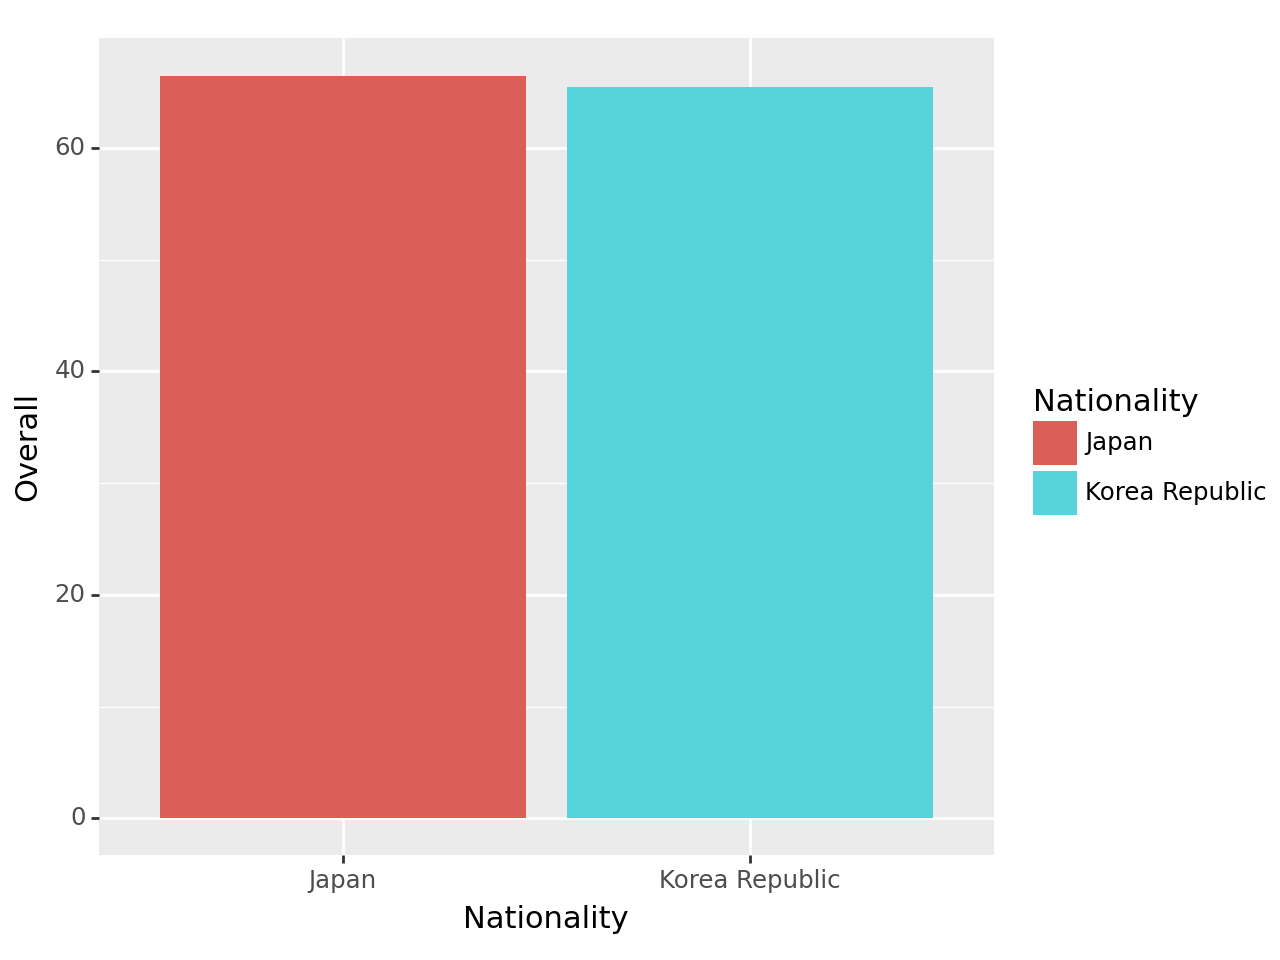

In [57]:
ggplot(data)+geom_col(aes(x='Nationality',y='Overall',fill='Nationality'))
#ggplot(data)+geom_col(aes(x='Nationality',y='Overall',color='Nationality'))

`-` 예시3: 한국과 일본의 평균연령 비교

In [59]:
data=df.groupby('Nationality').agg({'Age':np.mean}).reset_index()
data

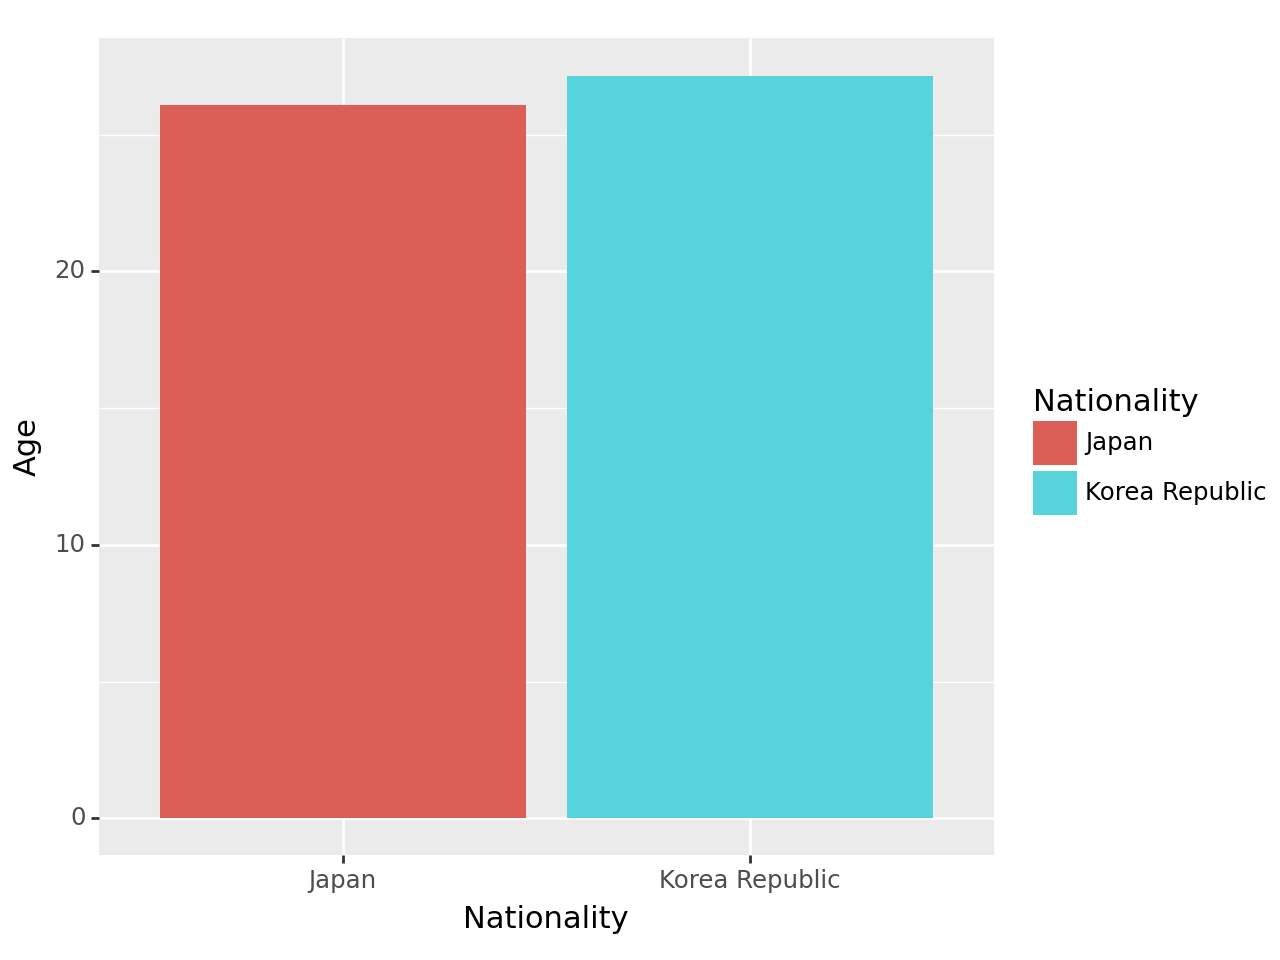

In [60]:
ggplot(data)+geom_col(aes(x='Nationality',y='Age',fill='Nationality'))

## geom_col + position=‘dodge’

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교

In [65]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

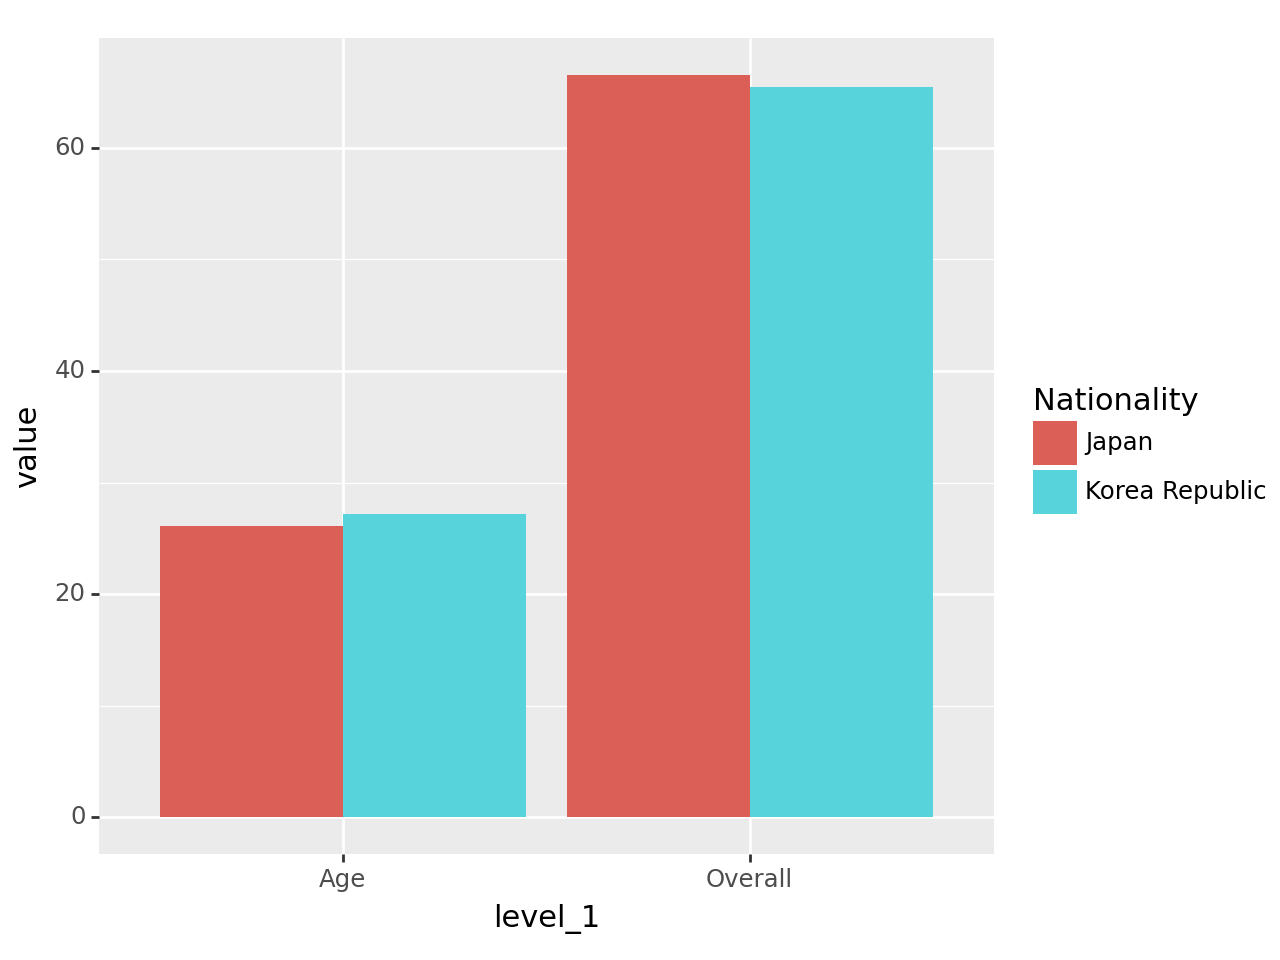

In [67]:
ggplot(data)+geom_col(
    aes(x='level_1',fill='Nationality',y='value'),position='dodge')

## geom_col + coord_flip()

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교 (90도회전)

In [70]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

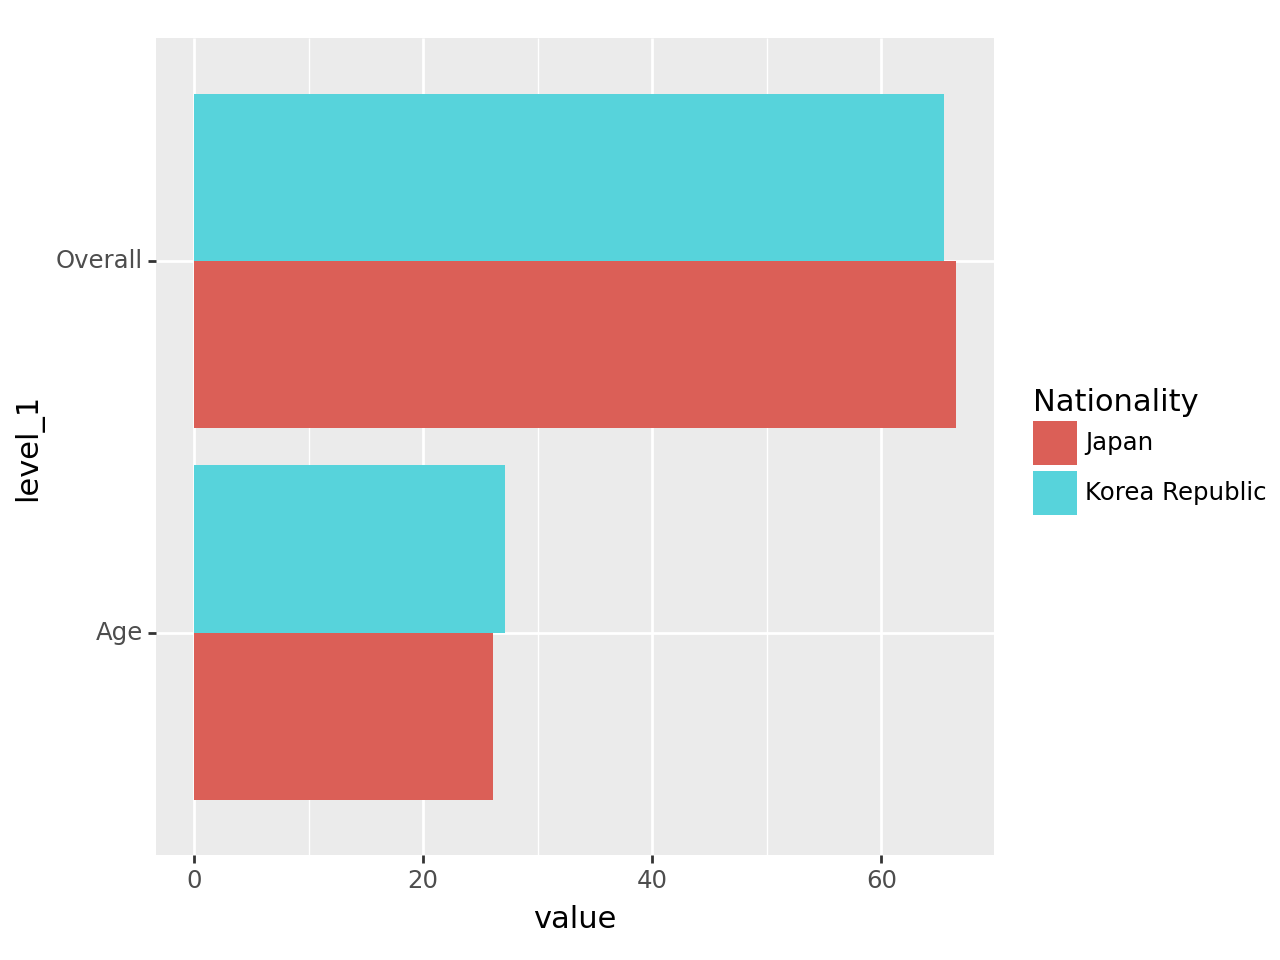

In [71]:
ggplot(data)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')\
+coord_flip()

## geom_col + facet_wrap(var)

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교 (면분할)

In [28]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

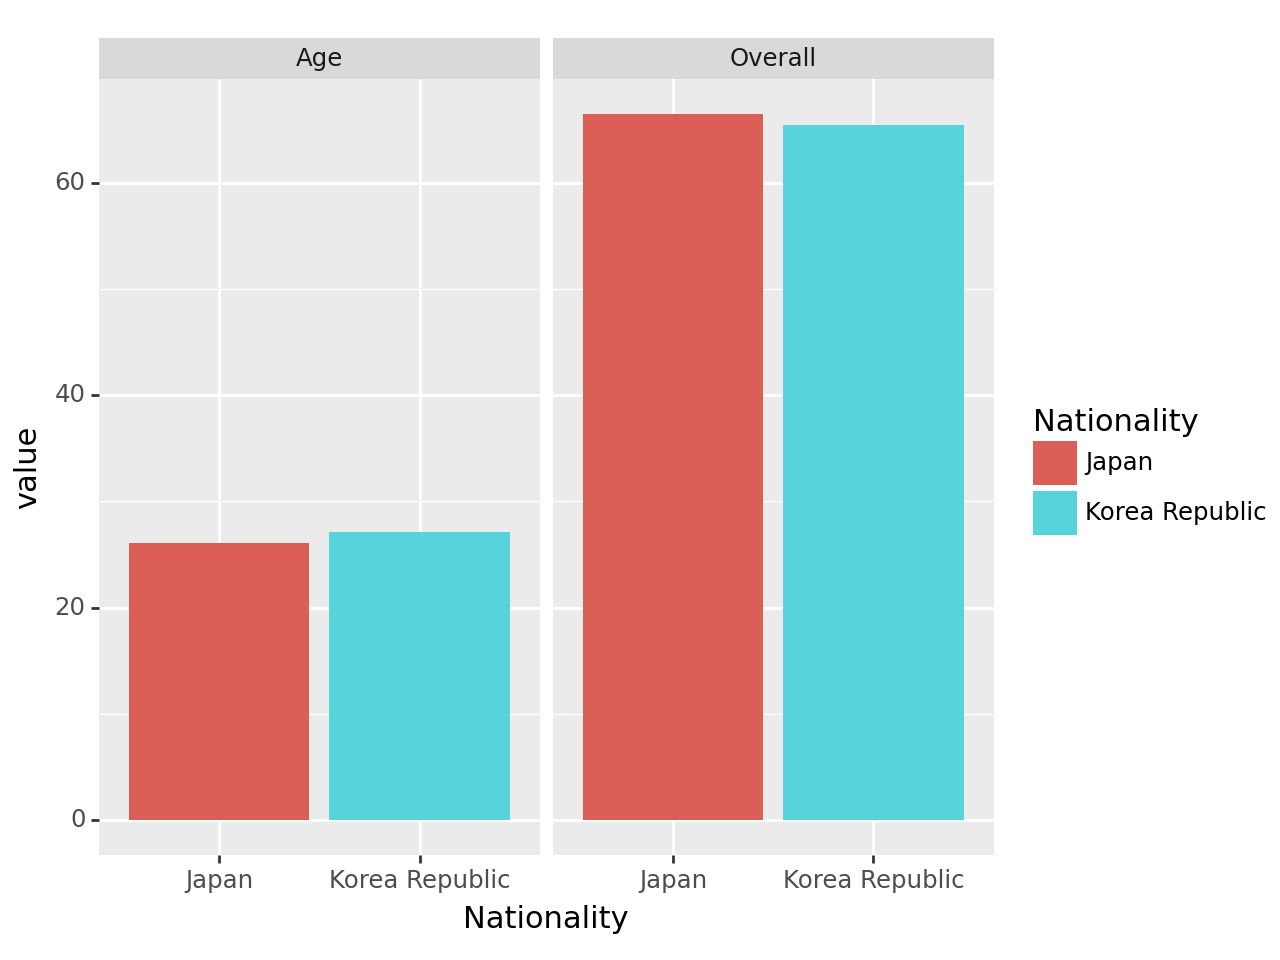

In [73]:
ggplot(data)+geom_col(aes(
    x='Nationality',
    fill='Nationality',
    y='value'
),position='dodge')\
+facet_wrap('level_1')

`-` 예시2: 한국과 일본의 평균연령+평균능력치 비교 (면분할)

In [32]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

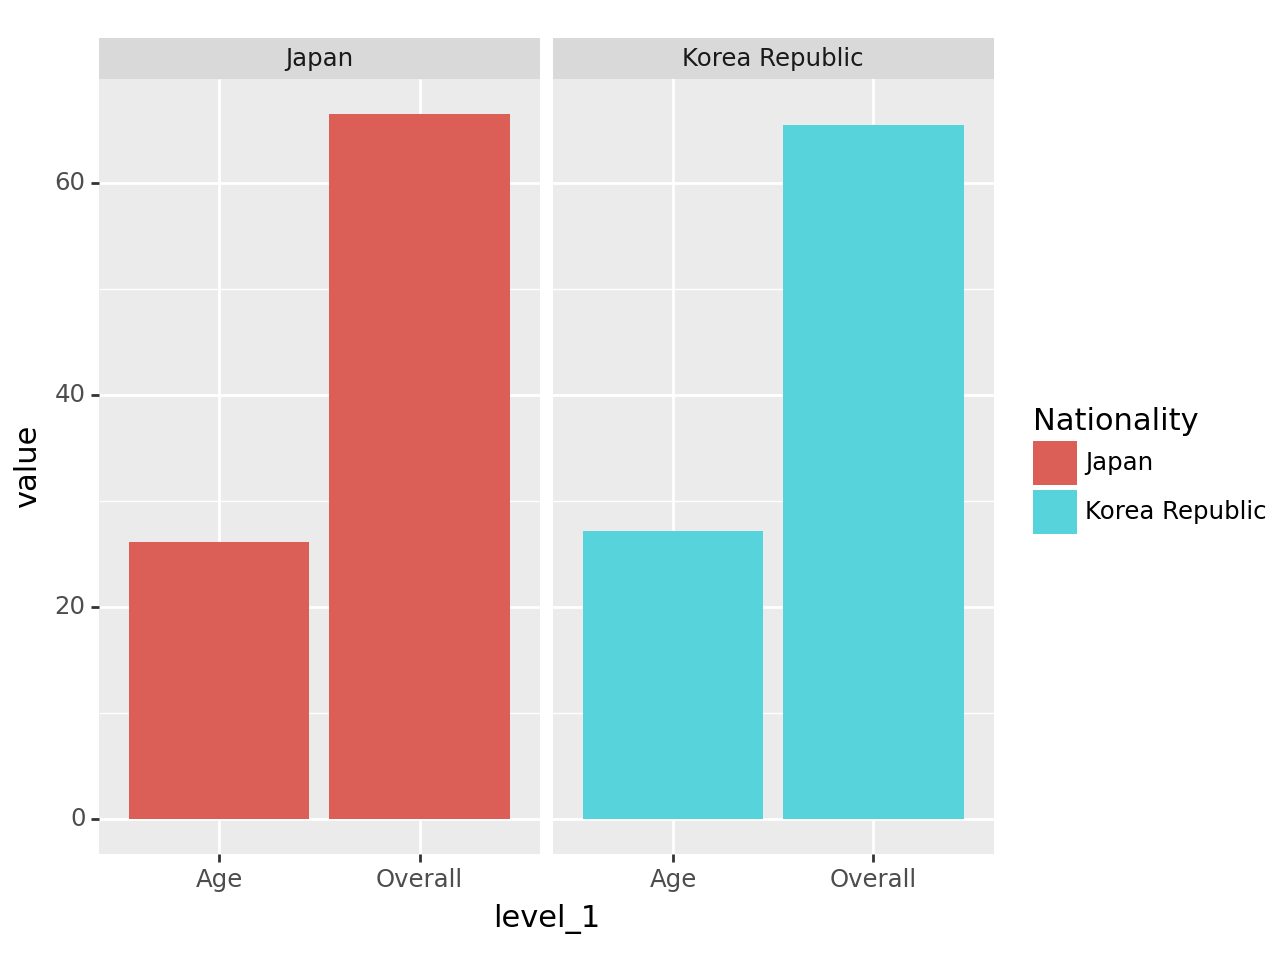

In [74]:
ggplot(data)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')\
+facet_wrap('Nationality')

## geom_col + facet_grid(‘var_y ~ var_x’)

`-` 예시1: 한국과 일본의 평균연령+평균능력치+최대능력치 비교 (면분할)

In [105]:
data = df.groupby('Nationality')\
.agg({'Overall':[np.mean,np.max],'Age':np.mean})\
.stack().stack().reset_index().rename({0:'value'},axis=1)
data

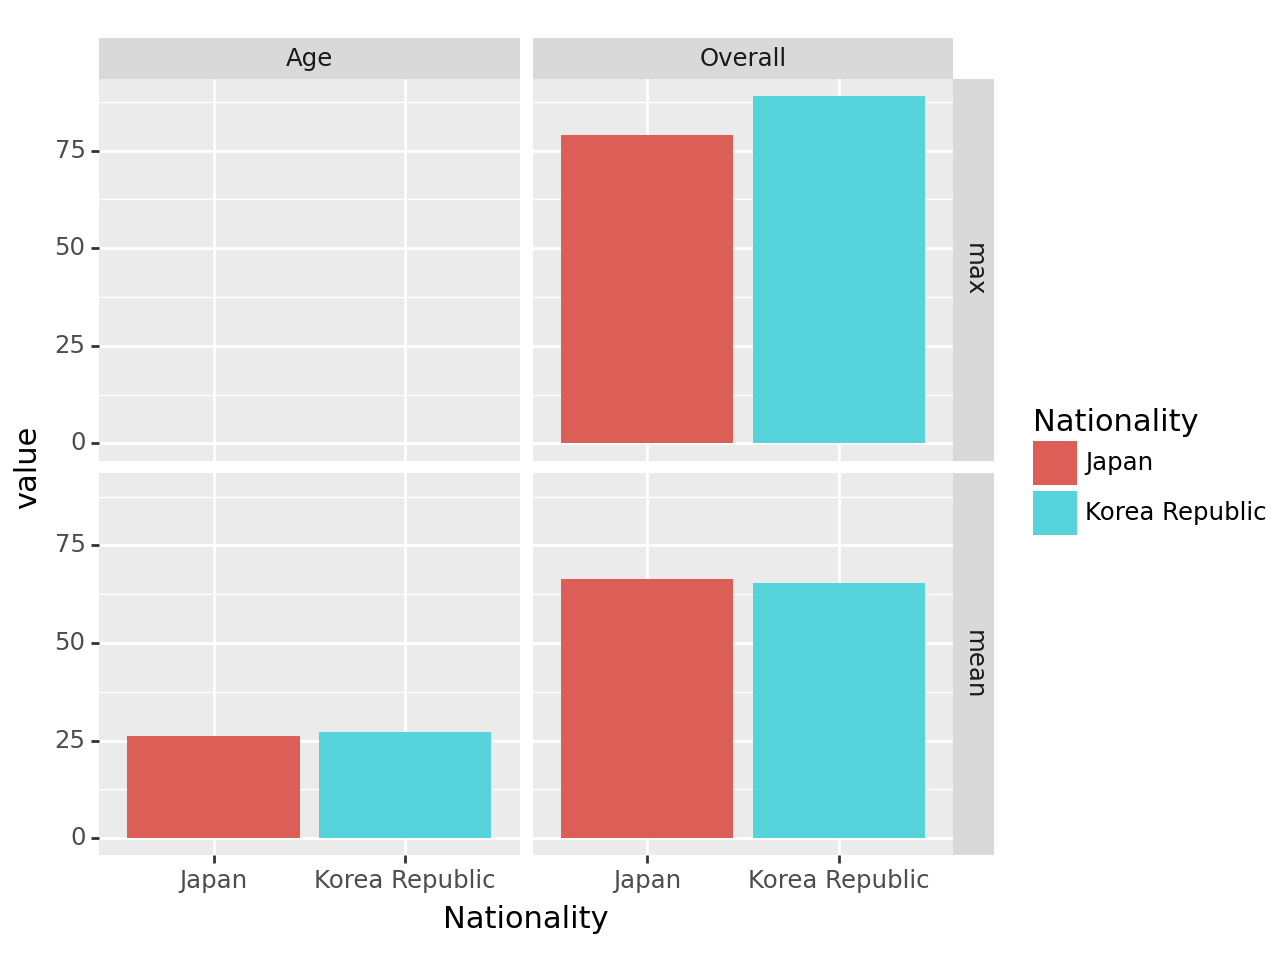

In [106]:
ggplot(data)\
+geom_col(aes(
    fill='Nationality',
    x='Nationality',
    y='value'),position='dodge')\
+facet_grid('level_1~level_2')

# 심슨의 역설

`-` ref- [데이터 과학자의 사고법: 더 나은 선택을 위한 통계학적 통찰의
힘](https://github.com/guebin/DV2022/blob/master/posts/ds.pdf)

-   구매할만한 책입니다

`-` 버클리대학교의 입학데이터

-   <https://github.com/guebin/DV2022/blob/master/_notebooks/ds.pdf>

`-` 주장: 버클리대학에 gender bias가 존재한다.

-   1973년 가을학기의 입학통계에 따르면 지원하는 남성이 여성보다 훨씬
    많이 합격했고, 그 차이가 너무 커서 우연의 일치라 보기 어렵다.

In [107]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df

## 시각화1: 전체합격률

In [133]:
_df1 = df.groupby(['gender','result'])\
.aggregate({'count':'sum'})\
.stack().reset_index().drop('level_2',axis=1)\
.rename({0:'count2'},axis=1)
_df1

In [136]:
_df2=df.groupby('gender').aggregate({'count':'sum'}).reset_index().rename({'count':'total'},axis=1)
_df2

In [141]:
data = _df1.merge(_df2).eval('rate = count2 / total').query('result == "pass"')
data

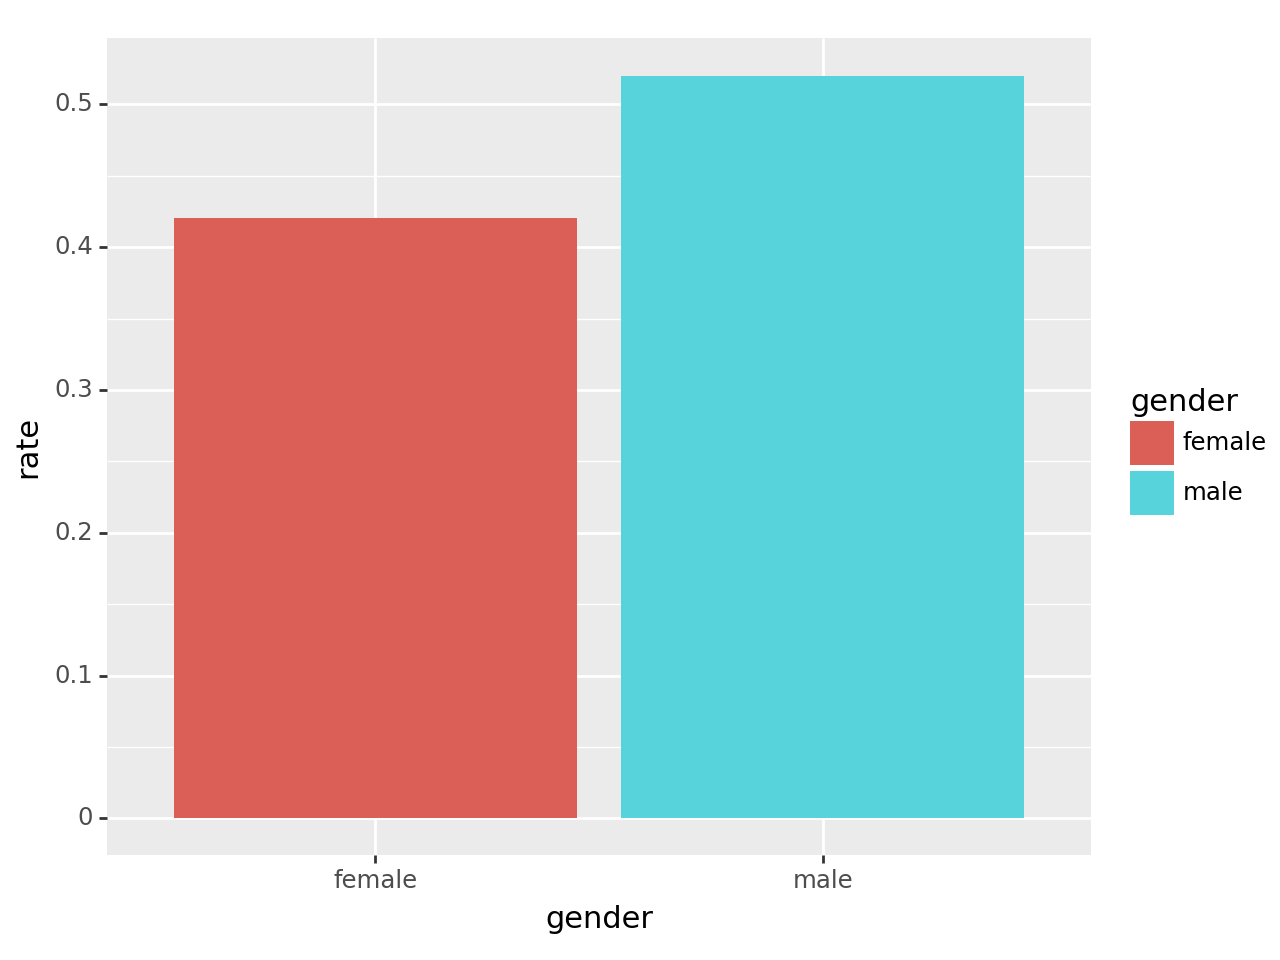

In [142]:
ggplot(data)+geom_col(
    aes(x='gender',
        fill='gender',
        y='rate')
)

`-` 결론: 남자의 합격률이 더 높다. $\to$ 성차별이 있어보인다(?)

## 시각화2: 학과별 합격률

In [164]:
_df = df.groupby(['department','gender'])\
.aggregate({'count':'sum'})\
.stack().reset_index()\
.rename({0:'total'},axis=1)
data = _df.merge(df)\
.query('result == "pass"')\
.eval('rate = count/total')

In [165]:
data

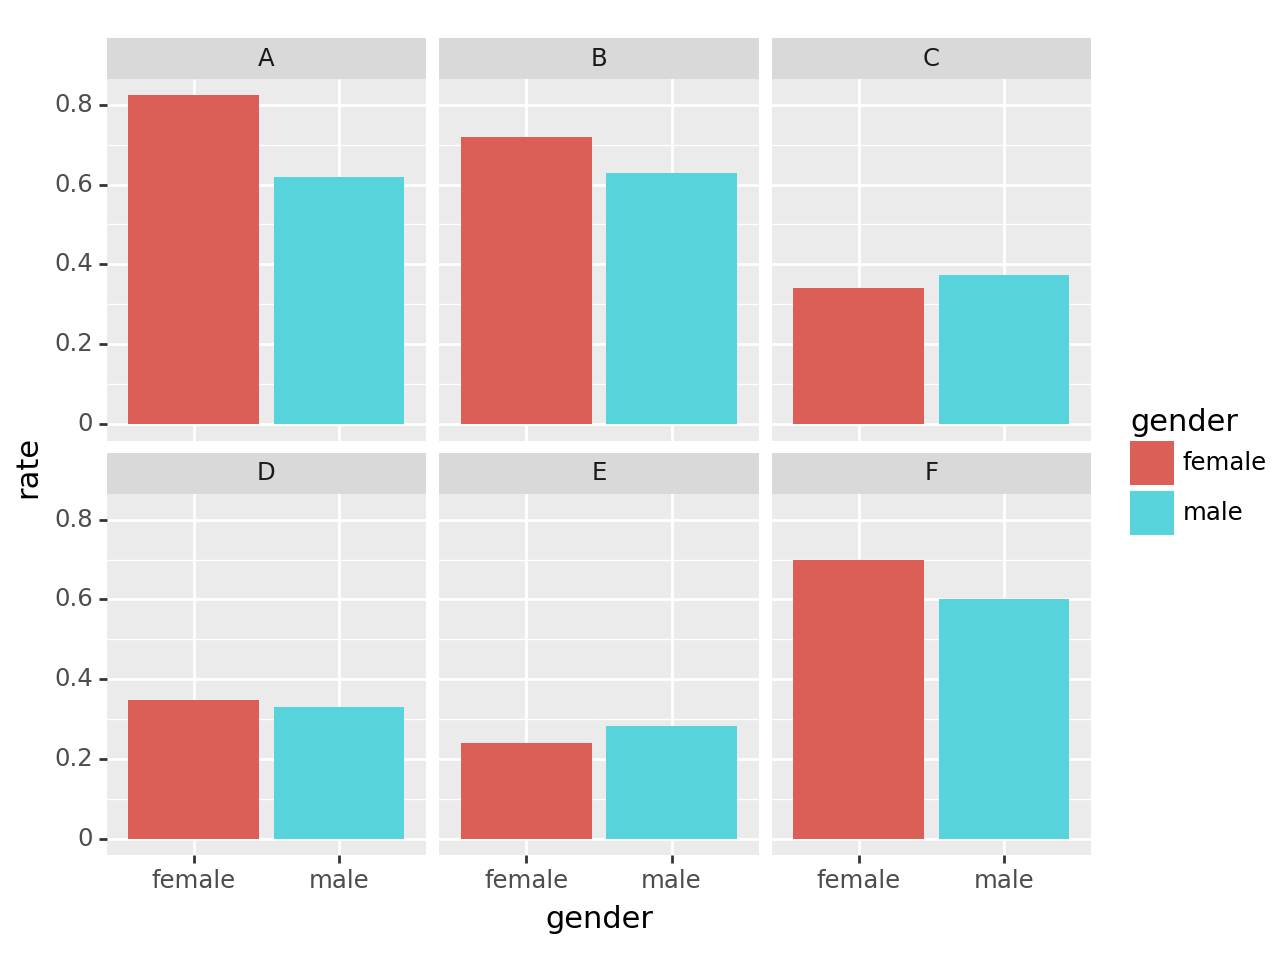

In [166]:
ggplot(data)\
+geom_col(aes(x='gender',fill='gender',y='rate'))\
+facet_wrap('department')

-   학과별로 살펴보니 오히려 A,B,F,D의 경우 여성의 합격률이 높다.

`-` 교재에서 설명한 이유: 여성이 합격률이 낮은 학과에만 많이 지원하였기
때문

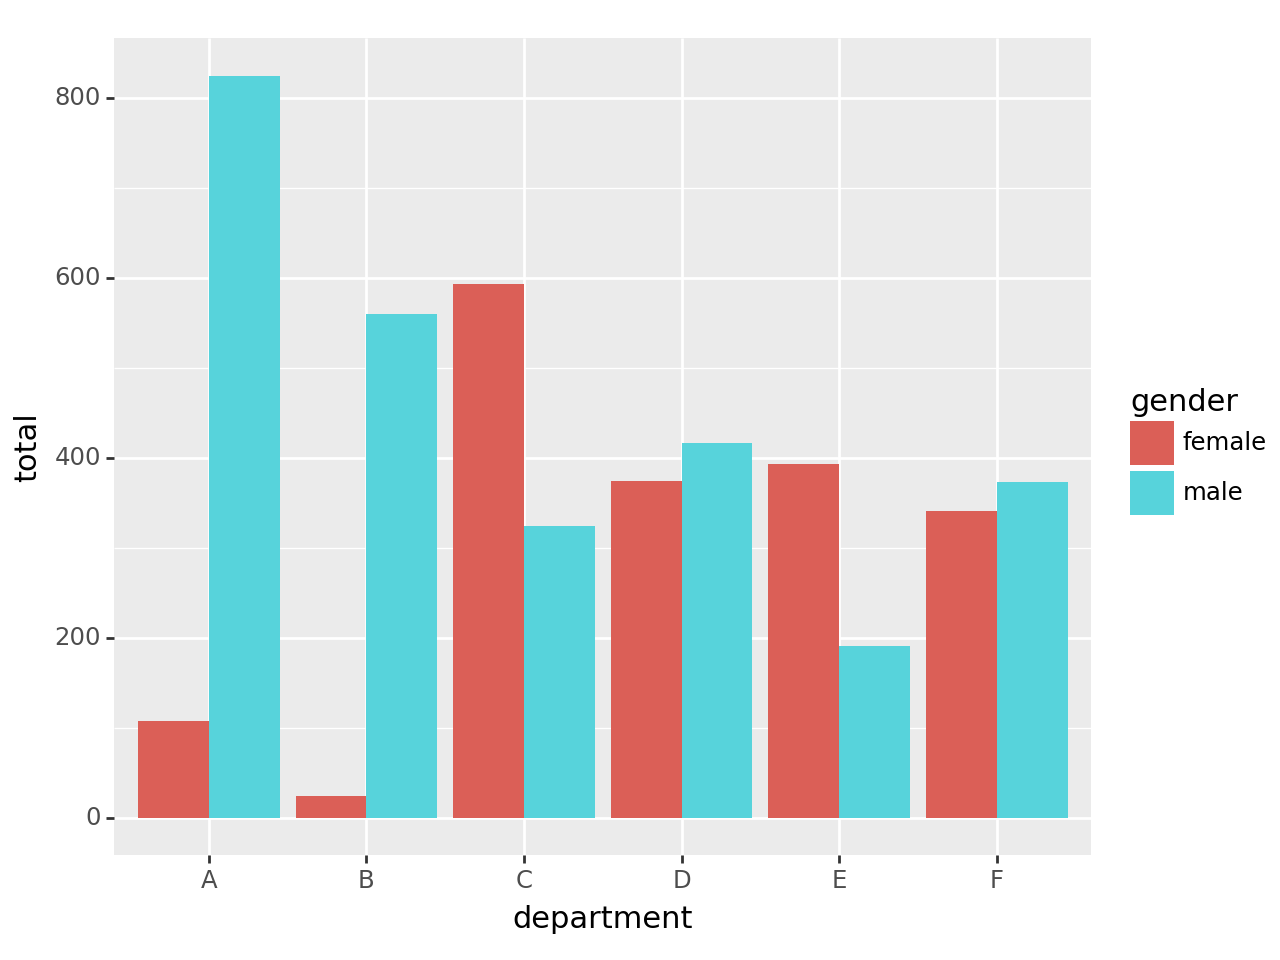

In [169]:
ggplot(data)+geom_col(aes(x='department',y='total',fill='gender'),position='dodge')

-   살펴보니 합격률이 높은 A,B학과의 경우 상대적으로 남성이 많이
    지원하였음. 합격률이 낮은 C,D학과는 상대적으로 여성이 많이 지원함.
    D,F의 지원수는 비슷